In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_table('/content/drive/MyDrive/ml_projects/smm4h/SMM4H_Task2_data/train.tsv')
val_data = pd.read_table('/content/drive/MyDrive/ml_projects/smm4h/SMM4H_Task2_data/validation.tsv')

In [3]:
train_data.head()

,id,Tweet,Claim,Stance,Premise
0,3054935,@realDonaldTrump It's too dangerous to hold th...,school closures,FAVOR,1
1,453444,If masks are so important why is the public no...,face masks,AGAINST,1
2,211600,But if schools close who is gonna occupy those...,school closures,FAVOR,1
3,3049718,@GavinNewsom be the Governor I thought you wer...,stay at home orders,FAVOR,1
4,5039679580998,@BBCNews 1. You are reporting 78% uptake on ma...,face masks,FAVOR,1


In [4]:
val_data.head()

,id,Tweet,Claim,Stance,Premise
0,7212131785749,Ordered a mask that had a cute chain attached ...,face masks,FAVOR,0
1,2367433035,Who is ready for some #baseball? #BaseballisB...,stay at home orders,NONE,0
2,496011,"@Mystere07623203 @va_shiva @Liberty13046 130,0...",face masks,FAVOR,1
3,1490686,When they ask me what I did with my life I wil...,face masks,FAVOR,0
4,1209366,Taylor not putting her album in physical store...,stay at home orders,FAVOR,0


In [5]:
val_data['Stance'].value_counts()

FAVOR      244
NONE       198
AGAINST    158
Name: Stance, dtype: int64

In [6]:
train_data['Stance'].value_counts()

FAVOR      1346
NONE       1336
AGAINST     874
Name: Stance, dtype: int64

In [7]:
train_data['Stance'] = train_data['Stance'].values.astype('U')
train_data['Tweet'] = train_data['Tweet'].values.astype('U')

In [8]:
val_data['Stance'] = val_data['Stance'].values.astype('U')
val_data['Tweet'] = val_data['Tweet'].values.astype('U')

## Get list of sentences

In [9]:
train_sentences = train_data["Tweet"].tolist()
val_sentences = val_data["Tweet"].tolist()
len(train_sentences), len(val_sentences)

(3556, 600)

In [10]:
# View first 10 lines of training sentences
train_sentences[:10]

["@realDonaldTrump It's too dangerous to hold the RNC, but let's send students and teachers back to school  #TrumpLiesAmericansDie",
 'If masks are so important why is the public not made aware of the ONLY mask that will protect the wearer from covid19 - the N95 mask?',
 'But if schools close who is gonna occupy those graves? Cause politicians(protected) smokers (protected) drunkards(protected) school kids &amp; teachers VERY EXPOSED.',
 '@GavinNewsom be the Governor I thought you were and order another #StayAtHome mandate. Clearly you know the numbers, #FlattenTheCurve &amp; save #California - for your children &amp; mine! #GavinNewsom #Covid_19',
 "@BBCNews 1. You are reporting 78% uptake on masks in many EU countries and 21% here while Brits stay at home to afraid to go out. Could the reason for this be the lack of mask wearing itself? I know its why I won't go out!",
 '@jmulich @Standwi78914908 The strongest motive for this is HongKongers’ distrust in China.  #WuhanVirus #CCPVirus'

## Make numeric labels


In [11]:
# One hot encode labels
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_data["Stance"].to_numpy().reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.transform(val_data["Stance"].to_numpy().reshape(-1, 1))

# Check what training labels look like
train_labels_one_hot

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

## Label encode labels

In [12]:
# Extract labels ("target" columns) and encode them into integers 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_data["Stance"].to_numpy())
val_labels_encoded = label_encoder.transform(val_data["Stance"].to_numpy())

# Check what training labels look like
train_labels_encoded

array([1, 0, 1, ..., 1, 0, 1])

In [13]:
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes, class_names

(3, array(['AGAINST', 'FAVOR', 'NONE'], dtype=object))

# Creating a series of model experiments


## Model 0: Getting a baseline


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create a pipeline
model_0 = Pipeline([
  ("tf-idf", TfidfVectorizer()),
  ("clf", MultinomialNB())
])

# Fit the pipeline to the training data
model_0.fit(X=train_sentences, 
            y=train_labels_encoded);

In [15]:
# Evaluate baseline on validation dataset
model_0.score(X=val_sentences,
              y=val_labels_encoded)

0.5516666666666666

## Preparing our data for deep sequence models


In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [17]:
# How long is each sentence on average?
sent_lens = [len(sentence.split()) for sentence in train_sentences]
avg_sent_len = np.mean(sent_lens)
avg_sent_len # return average sentence length (in tokens)

27.26996625421822

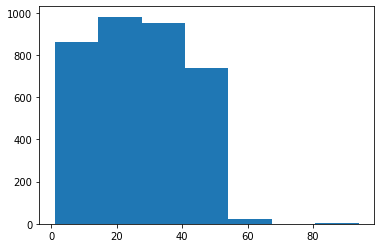

In [18]:
# What's the distribution look like?
import matplotlib.pyplot as plt
plt.hist(sent_lens, bins=7);

In [19]:
# How long of a sentence covers 95% of the lengths?
output_seq_len = int(np.percentile(sent_lens, 95))
output_seq_len

48

In [20]:
max(sent_lens)

94

## Create Text Vectorizer

In [21]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer = TextVectorization(output_sequence_length = output_seq_len)

In [22]:
# Adapt text vectorizer to training sentences
text_vectorizer.adapt(train_sentences)

In [23]:
# Test out text vectorizer
import random
target_sentence = random.choice(train_sentences)
print(f"Text:\n{target_sentence}")
print(f"\nLength of text: {len(target_sentence.split())}")
print(f"\nVectorized text:\n{text_vectorizer([target_sentence])}")

Text:
:notes::arrow_forward:Open fire @patorankingfire @busiswaah On #Totorimuzik @Djitchyfingazz #spinning:repeat_one: LISTENLIVEON #OURAPPONPLAYSTORE AND #WEBSITEONBIO

Length of text: 12

Vectorized text:
[[4036 1438 1833 4916   17  142   65   62   61   60    4   59    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]]


In [24]:
# How many words in our training vocabulary?
train_vocab = text_vectorizer.get_vocabulary()
print(f"Number of words in vocabulary: {len(train_vocab)}"), 
print(f"Most common words in the vocabulary: {train_vocab[:5]}")
print(f"Least common words in the vocabulary: {train_vocab[-5:]}")

Number of words in vocabulary: 13056
Most common words in the vocabulary: ['', '[UNK]', 'the', 'to', 'and']
Least common words in the vocabulary: ['04', '0079', '006', '0037', '00079']


In [25]:
text_vectorizer.get_config()

{'batch_input_shape': (None,),
 'dtype': 'string',
 'idf_weights': None,
 'max_tokens': None,
 'name': 'text_vectorization',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 48,
 'pad_to_max_tokens': False,
 'ragged': False,
 'sparse': False,
 'split': 'whitespace',
 'standardize': 'lower_and_strip_punctuation',
 'trainable': True,
 'vocabulary': None}

## Create custom text embedding


In [26]:
# Create token embedding layer
token_embed = layers.Embedding(input_dim=len(train_vocab), # length of vocabulary
                               output_dim=128, # Note: different embedding sizes result in drastically different numbers of parameters to train
                               # Use masking to handle variable sequence lengths (save space)
                               mask_zero=True,
                               name="token_embedding") 

# Show example embedding
print(f"Sentence before vectorization:\n{target_sentence}\n")
vectorized_sentence = text_vectorizer([target_sentence])
print(f"Sentence after vectorization (before embedding):\n{vectorized_sentence}\n")
embedded_sentence = token_embed(vectorized_sentence)
print(f"Sentence after embedding:\n{embedded_sentence}\n")
print(f"Embedded sentence shape: {embedded_sentence.shape}")

Sentence before vectorization:
:notes::arrow_forward:Open fire @patorankingfire @busiswaah On #Totorimuzik @Djitchyfingazz #spinning:repeat_one: LISTENLIVEON #OURAPPONPLAYSTORE AND #WEBSITEONBIO

Sentence after vectorization (before embedding):
[[4036 1438 1833 4916   17  142   65   62   61   60    4   59    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]]

Sentence after embedding:
[[[ 0.04148454 -0.03189205 -0.01280993 ...  0.02112535  0.04872514
   -0.00423628]
  [-0.03905142 -0.01009908  0.0155187  ... -0.00552381 -0.03567797
   -0.03154116]
  [ 0.02560486  0.04919176 -0.04463502 ... -0.04616242  0.03162832
   -0.04659305]
  ...
  [ 0.01852639 -0.02862183 -0.01630527 ... -0.01557336  0.02308634
    0.02853665]
  [ 0.01852639 -0.02862183 -0.01630527 ... -0.01557336  0.02308634
    0.02853665]
  [ 0.01852639 -0.02862183 -0.01630527 ... -0.01557336  0

## Create datasets


In [27]:
# Turn our data into TensorFlow Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
valid_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))

train_dataset, valid_dataset

(<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(3,), dtype=tf.float64, name=None))>,
 <TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(3,), dtype=tf.float64, name=None))>)

In [28]:
# Take the TensorSliceDataset's and turn them into prefetched batches
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset, valid_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 3), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 3), dtype=tf.float64, name=None))>)

In [93]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

## Model 1: Conv1D with token embeddings


In [94]:
# Create 1D convolutional model to process sequences
inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectors = text_vectorizer(inputs) # vectorize text inputs
token_embeddings = token_embed(text_vectors) # create embedding
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(token_embeddings)
x = layers.GlobalAveragePooling1D()(x) # condense the output of our feature vector
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_1 = tf.keras.Model(inputs, outputs)

# Compile
model_1.compile(loss="categorical_crossentropy", # if your labels are integer form (not one hot) use sparse_categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [95]:
# Get summary of Conv1D model
model_1.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 48)               0         
 torization)                                                     
                                                                 
 token_embedding (Embedding)  (None, 48, 128)          1671168   
                                                                 
 conv1d_4 (Conv1D)           (None, 48, 64)            41024     
                                                                 
 global_average_pooling1d_3   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_11 (Dense)            (None, 3)                 195 

In [96]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'min',
                                                  verbose = 1, patience = 7)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                                 patience=5, min_lr=0.00001)

In [97]:
# Fit the model
model_1_history = model_1.fit(train_dataset,
                              epochs=100,
                              validation_data=valid_dataset,
                              callbacks=[early_stopping, reduce_lr,create_model_checkpoint(model_name='model_1')])

Epoch 1/100
102/112 [==========================>...] - ETA: 0s - loss: 0.9891 - accuracy: 0.6088INFO:tensorflow:Assets written to: model_experiments/model_1/assets


INFO:tensorflow:Assets written to: model_experiments/model_1/assets


112/112 [==============================] - 2s 15ms/step - loss: 0.9832 - accuracy: 0.6100 - val_loss: 0.9710 - val_accuracy: 0.5383 - lr: 1.0000e-04
Epoch 2/100
103/112 [==========================>...] - ETA: 0s - loss: 0.7764 - accuracy: 0.7257INFO:tensorflow:Assets written to: model_experiments/model_1/assets


INFO:tensorflow:Assets written to: model_experiments/model_1/assets


112/112 [==============================] - 2s 14ms/step - loss: 0.7735 - accuracy: 0.7283 - val_loss: 0.8928 - val_accuracy: 0.5717 - lr: 1.0000e-04
Epoch 3/100
102/112 [==========================>...] - ETA: 0s - loss: 0.6205 - accuracy: 0.8459INFO:tensorflow:Assets written to: model_experiments/model_1/assets


INFO:tensorflow:Assets written to: model_experiments/model_1/assets


112/112 [==============================] - 2s 17ms/step - loss: 0.6168 - accuracy: 0.8490 - val_loss: 0.8435 - val_accuracy: 0.6367 - lr: 1.0000e-04
Epoch 4/100
104/112 [==========================>...] - ETA: 0s - loss: 0.4998 - accuracy: 0.9141INFO:tensorflow:Assets written to: model_experiments/model_1/assets


INFO:tensorflow:Assets written to: model_experiments/model_1/assets


112/112 [==============================] - 2s 14ms/step - loss: 0.4970 - accuracy: 0.9145 - val_loss: 0.8123 - val_accuracy: 0.6517 - lr: 1.0000e-04
Epoch 5/100
112/112 [==============================] - ETA: 0s - loss: 0.4045 - accuracy: 0.9457INFO:tensorflow:Assets written to: model_experiments/model_1/assets


INFO:tensorflow:Assets written to: model_experiments/model_1/assets


112/112 [==============================] - 2s 14ms/step - loss: 0.4045 - accuracy: 0.9457 - val_loss: 0.7938 - val_accuracy: 0.6617 - lr: 1.0000e-04
Epoch 6/100
103/112 [==========================>...] - ETA: 0s - loss: 0.3366 - accuracy: 0.9630INFO:tensorflow:Assets written to: model_experiments/model_1/assets


INFO:tensorflow:Assets written to: model_experiments/model_1/assets


112/112 [==============================] - 2s 14ms/step - loss: 0.3340 - accuracy: 0.9626 - val_loss: 0.7848 - val_accuracy: 0.6733 - lr: 1.0000e-04
Epoch 7/100
112/112 [==============================] - ETA: 0s - loss: 0.2805 - accuracy: 0.9688INFO:tensorflow:Assets written to: model_experiments/model_1/assets


INFO:tensorflow:Assets written to: model_experiments/model_1/assets


112/112 [==============================] - 2s 14ms/step - loss: 0.2805 - accuracy: 0.9688 - val_loss: 0.7826 - val_accuracy: 0.6733 - lr: 1.0000e-04
Epoch 8/100
112/112 [==============================] - 1s 5ms/step - loss: 0.2396 - accuracy: 0.9722 - val_loss: 0.7853 - val_accuracy: 0.6683 - lr: 1.0000e-04
Epoch 9/100
112/112 [==============================] - 1s 5ms/step - loss: 0.2079 - accuracy: 0.9747 - val_loss: 0.7917 - val_accuracy: 0.6650 - lr: 1.0000e-04
Epoch 10/100
112/112 [==============================] - 1s 5ms/step - loss: 0.1827 - accuracy: 0.9772 - val_loss: 0.8005 - val_accuracy: 0.6633 - lr: 1.0000e-04
Epoch 11/100
112/112 [==============================] - 1s 5ms/step - loss: 0.1625 - accuracy: 0.9778 - val_loss: 0.8109 - val_accuracy: 0.6650 - lr: 1.0000e-04
Epoch 12/100
112/112 [==============================] - 1s 5ms/step - loss: 0.1459 - accuracy: 0.9783 - val_loss: 0.8229 - val_accuracy: 0.6633 - lr: 1.0000e-04
Epoch 13/100
112/112 [==========================

In [99]:
model_1 = tf.keras.models.load_model("model_experiments/model_1")

model_1.evaluate(valid_dataset)

19/19 [==============================] - 0s 3ms/step - loss: 0.7826 - accuracy: 0.6733


[0.7825976610183716, 0.6733333468437195]

In [100]:
model_1_pred_probs = model_1.predict(valid_dataset)
model_1_pred_probs

array([[0.17551237, 0.6654174 , 0.15907027],
       [0.2691981 , 0.18721461, 0.54358727],
       [0.40826342, 0.1127606 , 0.47897592],
       ...,
       [0.5400207 , 0.11994679, 0.34003252],
       [0.29324615, 0.63788074, 0.06887306],
       [0.12243205, 0.8555892 , 0.0219787 ]], dtype=float32)

In [101]:
# Convert pred probs to classes
model_1_preds = tf.argmax(model_1_pred_probs, axis=1)
model_1_preds

<tf.Tensor: shape=(600,), dtype=int64, numpy=
array([1, 2, 2, 1, 1, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 2, 1, 2, 2, 2, 1,
       0, 2, 1, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 0, 0, 0, 2, 1,
       2, 2, 0, 2, 0, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 0, 2, 1, 1,
       2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 0, 1, 0, 0, 2, 1, 1, 0, 1, 0,
       0, 1, 2, 0, 2, 2, 1, 0, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 1, 1, 1,
       2, 0, 0, 2, 2, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 0,
       2, 1, 2, 0, 2, 0, 1, 0, 1, 2, 0, 2, 2, 0, 2, 2, 1, 0, 0, 2, 1, 2,
       2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 1, 0, 2, 1, 1, 2, 1, 2, 0, 2, 1, 1,
       2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 0, 2, 0, 1, 0, 2, 2, 0, 0, 2,
       2, 0, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 0, 1, 0, 0, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 0, 2, 1, 1, 0, 2,
       2, 2, 1, 0, 1, 2, 2, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 2, 2, 2, 0, 0,
       1, 2, 0, 2, 0, 2, 2, 1, 2, 1, 2, 0, 1, 2, 2, 0, 1, 1, 1, 1, 1, 2,
     

In [102]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.
  Args:
      y_true: true labels in the form of a 1D array
      y_pred: predicted labels in the form of a 1D array
  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [103]:
# Calculate model_1 results
model_1_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_1_preds)
model_1_results# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

## Model 2: Feature extraction with pretrained token embeddings


In [104]:
# Download pretrained TensorFlow Hub USE
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")

In [105]:
# Test out the embedding on a random sentence
random_training_sentence = random.choice(train_sentences)
print(f"Random training sentence:\n{random_training_sentence}\n")
use_embedded_sentence = tf_hub_embedding_layer([random_training_sentence])
print(f"Sentence after embedding:\n{use_embedded_sentence[0][:30]} (truncated output)...\n")
print(f"Length of sentence embedding:\n{len(use_embedded_sentence[0])}")

Random training sentence:
@NeilClark66 Do we not cover and protect various other organs from our environment? Have we evolved to have skin that doesn't burn into cancerous lesions? How many examples do you need @NeilClark66 before you understand that your opinion of mask-wearing is utter nonsense

Sentence after embedding:
[-0.03721179 -0.02393135 -0.01056541 -0.00849822  0.0160763  -0.08244635
  0.00346968 -0.02170288  0.04475144  0.01279258  0.09302148 -0.01371347
 -0.03461426  0.03417289 -0.00625607 -0.06334883 -0.06891181 -0.07104567
  0.0361645   0.0087021  -0.05968498  0.06058986 -0.02500449  0.04021478
  0.00078447 -0.01245526  0.04636483 -0.04561308  0.00063497  0.08275174] (truncated output)...

Length of sentence embedding:
512


### Building and fitting an NLP feature extraction model from TensorFlow Hub

In [106]:
# Define feature extractor model using TF Hub layer
inputs = layers.Input(shape=[], dtype=tf.string)
pretrained_embedding = tf_hub_embedding_layer(inputs) # tokenize text and create embedding
x = layers.Dense(128, activation="relu")(pretrained_embedding) # add a fully connected layer on top of the embedding
# Note: you could add more layers here if you wanted to
outputs = layers.Dense(3, activation="softmax")(x) # create the output layer
model_2 = tf.keras.Model(inputs=inputs,
                        outputs=outputs)

# Compile the model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [107]:
# Get a summary of the model
model_2.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None,)]                 0         
                                                                 
 universal_sentence_encoder   (None, 512)              256797824 
 (KerasLayer)                                                    
                                                                 
 dense_12 (Dense)            (None, 128)               65664     
                                                                 
 dense_13 (Dense)            (None, 3)                 387       
                                                                 
Total params: 256,863,875
Trainable params: 66,051
Non-trainable params: 256,797,824
_________________________________________________________________


In [108]:
# Fit feature extractor model for 3 epochs
model_2.fit(train_dataset,
            epochs=100,
            validation_data=valid_dataset,
            callbacks=[early_stopping, reduce_lr,create_model_checkpoint(model_name='model_2')])

Epoch 1/100
110/112 [============================>.] - ETA: 0s - loss: 0.9357 - accuracy: 0.5631INFO:tensorflow:Assets written to: model_experiments/model_2/assets


INFO:tensorflow:Assets written to: model_experiments/model_2/assets


112/112 [==============================] - 13s 94ms/step - loss: 0.9352 - accuracy: 0.5627 - val_loss: 0.8604 - val_accuracy: 0.6100 - lr: 0.0010
Epoch 2/100
112/112 [==============================] - ETA: 0s - loss: 0.8199 - accuracy: 0.6347INFO:tensorflow:Assets written to: model_experiments/model_2/assets


INFO:tensorflow:Assets written to: model_experiments/model_2/assets


112/112 [==============================] - 11s 101ms/step - loss: 0.8199 - accuracy: 0.6347 - val_loss: 0.8212 - val_accuracy: 0.6333 - lr: 0.0010
Epoch 3/100
112/112 [==============================] - ETA: 0s - loss: 0.7743 - accuracy: 0.6589INFO:tensorflow:Assets written to: model_experiments/model_2/assets


INFO:tensorflow:Assets written to: model_experiments/model_2/assets


112/112 [==============================] - 10s 89ms/step - loss: 0.7743 - accuracy: 0.6589 - val_loss: 0.8110 - val_accuracy: 0.6367 - lr: 0.0010
Epoch 4/100
109/112 [============================>.] - ETA: 0s - loss: 0.7430 - accuracy: 0.6743INFO:tensorflow:Assets written to: model_experiments/model_2/assets


INFO:tensorflow:Assets written to: model_experiments/model_2/assets


112/112 [==============================] - 11s 95ms/step - loss: 0.7442 - accuracy: 0.6729 - val_loss: 0.8086 - val_accuracy: 0.6317 - lr: 0.0010
Epoch 5/100
109/112 [============================>.] - ETA: 0s - loss: 0.7186 - accuracy: 0.6932INFO:tensorflow:Assets written to: model_experiments/model_2/assets


INFO:tensorflow:Assets written to: model_experiments/model_2/assets


112/112 [==============================] - 10s 90ms/step - loss: 0.7197 - accuracy: 0.6918 - val_loss: 0.8079 - val_accuracy: 0.6333 - lr: 0.0010
Epoch 6/100
112/112 [==============================] - 1s 13ms/step - loss: 0.6971 - accuracy: 0.7050 - val_loss: 0.8085 - val_accuracy: 0.6300 - lr: 0.0010
Epoch 7/100
112/112 [==============================] - 1s 13ms/step - loss: 0.6751 - accuracy: 0.7165 - val_loss: 0.8100 - val_accuracy: 0.6350 - lr: 0.0010
Epoch 8/100
112/112 [==============================] - 1s 13ms/step - loss: 0.6534 - accuracy: 0.7250 - val_loss: 0.8121 - val_accuracy: 0.6333 - lr: 0.0010
Epoch 9/100
112/112 [==============================] - 1s 13ms/step - loss: 0.6312 - accuracy: 0.7365 - val_loss: 0.8136 - val_accuracy: 0.6333 - lr: 0.0010
Epoch 10/100
112/112 [==============================] - 1s 13ms/step - loss: 0.6087 - accuracy: 0.7500 - val_loss: 0.8149 - val_accuracy: 0.6333 - lr: 0.0010
Epoch 11/100
112/112 [==============================] - 1s 13ms/step

In [109]:
model_2 = tf.keras.models.load_model("model_experiments/model_2")

model_2.evaluate(valid_dataset)

19/19 [==============================] - 1s 11ms/step - loss: 0.8079 - accuracy: 0.6333


[0.8079317212104797, 0.6333333253860474]

In [110]:
# Make predictions with feature extraction model
model_2_pred_probs = model_2.predict(valid_dataset)
model_2_pred_probs

array([[0.23351084, 0.72789836, 0.03859076],
       [0.0282152 , 0.10116103, 0.87062377],
       [0.13535383, 0.491957  , 0.3726891 ],
       ...,
       [0.5832659 , 0.3201278 , 0.09660633],
       [0.15482959, 0.70262593, 0.14254448],
       [0.26245105, 0.59315205, 0.14439687]], dtype=float32)

In [111]:
model_2_preds = tf.argmax(model_2_pred_probs, axis=1)
model_2_preds

<tf.Tensor: shape=(600,), dtype=int64, numpy=
array([1, 2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 2, 2, 0, 0, 2, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 1, 1, 0, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 0, 2, 0, 0, 1, 2, 1, 0, 2, 2, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2,
       2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 0, 1, 0, 2, 2, 2, 1, 1, 1, 2,
       0, 1, 2, 0, 2, 1, 2, 0, 1, 1, 1, 2, 2, 0, 1, 1, 2, 0, 2, 0, 1, 1,
       0, 1, 2, 2, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 0,
       2, 1, 2, 0, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 0, 1, 2,
       2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 0, 1, 1, 1,
       2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0,
       2, 1, 1, 2, 0, 1, 2, 2, 0, 1, 1, 2, 0, 2, 1, 0, 2, 0, 1, 2, 1, 1,
       2, 1, 2, 1, 2, 0, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0, 1, 2, 0, 0,
       1, 0, 0, 2, 0, 2, 2, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     

In [112]:
model_2_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 63.33333333333333,
 'f1': 0.6265931816301622,
 'precision': 0.6365029394702891,
 'recall': 0.6333333333333333}

## Model 3: Conv1D with character embeddings


### Creating a character-level tokenizer


In [113]:
# Make function to split sentences into characters
def split_chars(text):
  return " ".join(list(text))

# Test splitting non-character-level sequence into characters
split_chars(random_training_sentence)

"@ N e i l C l a r k 6 6   D o   w e   n o t   c o v e r   a n d   p r o t e c t   v a r i o u s   o t h e r   o r g a n s   f r o m   o u r   e n v i r o n m e n t ?   H a v e   w e   e v o l v e d   t o   h a v e   s k i n   t h a t   d o e s n ' t   b u r n   i n t o   c a n c e r o u s   l e s i o n s ?   H o w   m a n y   e x a m p l e s   d o   y o u   n e e d   @ N e i l C l a r k 6 6   b e f o r e   y o u   u n d e r s t a n d   t h a t   y o u r   o p i n i o n   o f   m a s k - w e a r i n g   i s   u t t e r   n o n s e n s e"

In [114]:
train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
print(train_chars[0])

@ r e a l D o n a l d T r u m p   I t ' s   t o o   d a n g e r o u s   t o   h o l d   t h e   R N C ,   b u t   l e t ' s   s e n d   s t u d e n t s   a n d   t e a c h e r s   b a c k   t o   s c h o o l     # T r u m p L i e s A m e r i c a n s D i e


In [115]:
char_lens = [len(sentence) for sentence in train_sentences]
mean_char_len = np.mean(char_lens)
mean_char_len

175.55483689538806

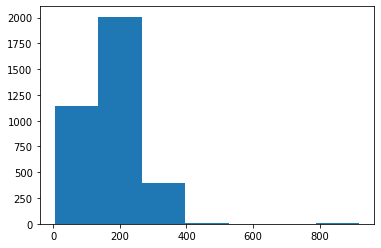

In [116]:
# Check the distribution of our sequences at character-level
import matplotlib.pyplot as plt
plt.hist(char_lens, bins=7);

In [117]:
output_seq_char_len = int(np.percentile(char_lens, 95))
output_seq_char_len

282

In [118]:
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [119]:
# Create char-level token vectorizer instance
NUM_CHAR_TOKENS = len(alphabet) + 2 # num characters in alphabet + space + OOV token
char_vectorizer = TextVectorization(max_tokens=NUM_CHAR_TOKENS,  
                                    output_sequence_length=output_seq_char_len,
                                    standardize="lower_and_strip_punctuation",
                                    name="char_vectorizer")

# Adapt character vectorizer to training characters
char_vectorizer.adapt(train_chars)

In [120]:
# Check character vocabulary characteristics
char_vocab = char_vectorizer.get_vocabulary()
print(f"Number of different characters in character vocab: {len(char_vocab)}")
print(f"5 most common characters: {char_vocab[:5]}")
print(f"5 least common characters: {char_vocab[-5:]}")

Number of different characters in character vocab: 70
5 most common characters: ['', '[UNK]', 'e', 'o', 'a']
5 least common characters: ['प', 'न', 'ज', 'ग', 'क']


In [121]:
# Test out character vectorizer
random_train_chars = random.choice(train_chars)
print(f"Charified text:\n{random_train_chars}")
print(f"\nLength of chars: {len(random_train_chars.split())}")
vectorized_chars = char_vectorizer([random_train_chars])
print(f"\nVectorized chars:\n{vectorized_chars}")
print(f"\nLength of vectorized chars: {len(vectorized_chars[0])}")

Charified text:
T h e   f a c t   t h a t   s o   m a n y   p e o p l e   a r e   c o m p l e t e l y   f i n e   w i t h   t h e   g o v e r n m e n t   & a m p ;   y o u r   e m p l o y e r s   t e l l i n g   y o u   e x a c t l y   w h a t   y o u   c a n / c a n ' t   d o ,   w h a t   y o u   w e a r ,   w h e r e   y o u   g o   i s   m i n d   b o g g l i n g .   A m e r i c a   i s   n o   l o n g e r     L a n d   o f   t h e   F r e e

Length of chars: 178

Vectorized chars:
[[ 5 10  2 20  4 13  5  5 10  4  5  7  3 15  4  6 17 16  2  3 16 11  2  4
   9  2 13  3 15 16 11  2  5  2 11 17 20  8  6  2 19  8  5 10  5 10  2 18
   3 23  2  9  6 15  2  6  5  4 15 16 17  3 14  9  2 15 16 11  3 17  2  9
   7  5  2 11 11  8  6 18 17  3 14  2 30  4 13  5 11 17 19 10  4  5 17  3
  14 13  4  6 13  4  6  5 12  3 19 10  4  5 17  3 14 19  2  4  9 19 10  2
   9  2 17  3 14 18  3  8  7 15  8  6 12 21  3 18 18 11  8  6 18  4 15  2
   9  8 13  4  8  7  6  3 11  3  6 18  2  9 11  4  6 12  3 20  5 

### Creating a character-level embedding


In [122]:
# Create char embedding layer
char_embed = layers.Embedding(input_dim=NUM_CHAR_TOKENS, # number of different characters
                              output_dim=25, # embedding dimension of each character (same as Figure 1 in https://arxiv.org/pdf/1612.05251.pdf)
                              mask_zero=False, # don't use masks (this messes up model_5 if set to True)
                              name="char_embed")

# Test out character embedding layer
print(f"Charified text (before vectorization and embedding):\n{random_train_chars}\n")
char_embed_example = char_embed(char_vectorizer([random_train_chars]))
print(f"Embedded chars (after vectorization and embedding):\n{char_embed_example}\n")
print(f"Character embedding shape: {char_embed_example.shape}")

Charified text (before vectorization and embedding):
T h e   f a c t   t h a t   s o   m a n y   p e o p l e   a r e   c o m p l e t e l y   f i n e   w i t h   t h e   g o v e r n m e n t   & a m p ;   y o u r   e m p l o y e r s   t e l l i n g   y o u   e x a c t l y   w h a t   y o u   c a n / c a n ' t   d o ,   w h a t   y o u   w e a r ,   w h e r e   y o u   g o   i s   m i n d   b o g g l i n g .   A m e r i c a   i s   n o   l o n g e r     L a n d   o f   t h e   F r e e

Embedded chars (after vectorization and embedding):
[[[ 0.04724974 -0.0217129   0.03536524 ... -0.02657925  0.02714119
   -0.02723793]
  [ 0.01926894 -0.0229112   0.00417865 ... -0.01002695 -0.0011994
    0.0059827 ]
  [ 0.01896635  0.04194038  0.04933656 ... -0.02447306 -0.04216983
   -0.01386411]
  ...
  [-0.00319137 -0.03744017  0.03609068 ... -0.03152891  0.04767407
    0.01281185]
  [-0.00319137 -0.03744017  0.03609068 ... -0.03152891  0.04767407
    0.01281185]
  [-0.00319137 -0.03744017  0.03609068 .


### Building a Conv1D model to fit on character embeddings


In [123]:
inputs = layers.Input(shape=(1,), dtype="string")
char_vectors = char_vectorizer(inputs)
char_embeddings = char_embed(char_vectors)
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(char_embeddings)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_3 = tf.keras.Model(inputs=inputs,
                         outputs=outputs,
                         name="model_3_conv1D_char_embedding")

# Compile model
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [124]:
# Check the summary of conv1d_char_model
model_3.summary()

Model: "model_3_conv1D_char_embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 1)]               0         
                                                                 
 char_vectorizer (TextVector  (None, 282)              0         
 ization)                                                        
                                                                 
 char_embed (Embedding)      (None, 282, 25)           1750      
                                                                 
 conv1d_5 (Conv1D)           (None, 282, 64)           8064      
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_14 (Dense)            (None, 3

In [125]:
# Create char datasets
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

train_char_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 3), dtype=tf.float64, name=None))>

In [126]:
# Fit the model on chars only
model_3_history = model_3.fit(train_char_dataset,
                              epochs=100,
                              validation_data=val_char_dataset,
                              callbacks=[early_stopping, reduce_lr,create_model_checkpoint(model_name='model_3')])

Epoch 1/100
106/112 [===========================>..] - ETA: 0s - loss: 1.0659 - accuracy: 0.4346INFO:tensorflow:Assets written to: model_experiments/model_3/assets


INFO:tensorflow:Assets written to: model_experiments/model_3/assets


112/112 [==============================] - 3s 20ms/step - loss: 1.0647 - accuracy: 0.4429 - val_loss: 1.0441 - val_accuracy: 0.4650 - lr: 0.0010
Epoch 2/100
108/112 [===========================>..] - ETA: 0s - loss: 1.0038 - accuracy: 0.5237INFO:tensorflow:Assets written to: model_experiments/model_3/assets


INFO:tensorflow:Assets written to: model_experiments/model_3/assets


112/112 [==============================] - 2s 14ms/step - loss: 1.0039 - accuracy: 0.5228 - val_loss: 0.9857 - val_accuracy: 0.4733 - lr: 0.0010
Epoch 3/100
109/112 [============================>.] - ETA: 0s - loss: 0.9277 - accuracy: 0.5605INFO:tensorflow:Assets written to: model_experiments/model_3/assets


INFO:tensorflow:Assets written to: model_experiments/model_3/assets


112/112 [==============================] - 1s 13ms/step - loss: 0.9271 - accuracy: 0.5599 - val_loss: 0.9513 - val_accuracy: 0.4917 - lr: 0.0010
Epoch 4/100
106/112 [===========================>..] - ETA: 0s - loss: 0.8799 - accuracy: 0.5991INFO:tensorflow:Assets written to: model_experiments/model_3/assets


INFO:tensorflow:Assets written to: model_experiments/model_3/assets


112/112 [==============================] - 1s 13ms/step - loss: 0.8763 - accuracy: 0.5996 - val_loss: 0.9358 - val_accuracy: 0.5317 - lr: 0.0010
Epoch 5/100
106/112 [===========================>..] - ETA: 0s - loss: 0.8454 - accuracy: 0.6170INFO:tensorflow:Assets written to: model_experiments/model_3/assets


INFO:tensorflow:Assets written to: model_experiments/model_3/assets


112/112 [==============================] - 1s 13ms/step - loss: 0.8414 - accuracy: 0.6187 - val_loss: 0.9249 - val_accuracy: 0.5533 - lr: 0.0010
Epoch 6/100
111/112 [============================>.] - ETA: 0s - loss: 0.8144 - accuracy: 0.6363INFO:tensorflow:Assets written to: model_experiments/model_3/assets


INFO:tensorflow:Assets written to: model_experiments/model_3/assets


112/112 [==============================] - 2s 14ms/step - loss: 0.8139 - accuracy: 0.6367 - val_loss: 0.9165 - val_accuracy: 0.5700 - lr: 0.0010
Epoch 7/100
106/112 [===========================>..] - ETA: 0s - loss: 0.7947 - accuracy: 0.6495INFO:tensorflow:Assets written to: model_experiments/model_3/assets


INFO:tensorflow:Assets written to: model_experiments/model_3/assets


112/112 [==============================] - 1s 13ms/step - loss: 0.7896 - accuracy: 0.6527 - val_loss: 0.9097 - val_accuracy: 0.5700 - lr: 0.0010
Epoch 8/100
110/112 [============================>.] - ETA: 0s - loss: 0.7678 - accuracy: 0.6634INFO:tensorflow:Assets written to: model_experiments/model_3/assets


INFO:tensorflow:Assets written to: model_experiments/model_3/assets


112/112 [==============================] - 2s 14ms/step - loss: 0.7668 - accuracy: 0.6634 - val_loss: 0.9046 - val_accuracy: 0.5683 - lr: 0.0010
Epoch 9/100
107/112 [===========================>..] - ETA: 0s - loss: 0.7482 - accuracy: 0.6776INFO:tensorflow:Assets written to: model_experiments/model_3/assets


INFO:tensorflow:Assets written to: model_experiments/model_3/assets


112/112 [==============================] - 2s 15ms/step - loss: 0.7454 - accuracy: 0.6786 - val_loss: 0.8989 - val_accuracy: 0.5667 - lr: 0.0010
Epoch 10/100
106/112 [===========================>..] - ETA: 0s - loss: 0.7308 - accuracy: 0.6840INFO:tensorflow:Assets written to: model_experiments/model_3/assets


INFO:tensorflow:Assets written to: model_experiments/model_3/assets


112/112 [==============================] - 2s 21ms/step - loss: 0.7246 - accuracy: 0.6873 - val_loss: 0.8961 - val_accuracy: 0.5783 - lr: 0.0010
Epoch 11/100
109/112 [============================>.] - ETA: 0s - loss: 0.7067 - accuracy: 0.6987INFO:tensorflow:Assets written to: model_experiments/model_3/assets


INFO:tensorflow:Assets written to: model_experiments/model_3/assets


112/112 [==============================] - 2s 20ms/step - loss: 0.7047 - accuracy: 0.6991 - val_loss: 0.8935 - val_accuracy: 0.5833 - lr: 0.0010
Epoch 12/100
110/112 [============================>.] - ETA: 0s - loss: 0.6866 - accuracy: 0.7054INFO:tensorflow:Assets written to: model_experiments/model_3/assets


INFO:tensorflow:Assets written to: model_experiments/model_3/assets


112/112 [==============================] - 3s 27ms/step - loss: 0.6854 - accuracy: 0.7064 - val_loss: 0.8929 - val_accuracy: 0.5867 - lr: 0.0010
Epoch 13/100
108/112 [===========================>..] - ETA: 0s - loss: 0.6682 - accuracy: 0.7156INFO:tensorflow:Assets written to: model_experiments/model_3/assets


INFO:tensorflow:Assets written to: model_experiments/model_3/assets


112/112 [==============================] - 2s 22ms/step - loss: 0.6663 - accuracy: 0.7154 - val_loss: 0.8924 - val_accuracy: 0.5900 - lr: 0.0010
Epoch 14/100
112/112 [==============================] - 1s 6ms/step - loss: 0.6481 - accuracy: 0.7269 - val_loss: 0.8927 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 15/100
112/112 [==============================] - 1s 6ms/step - loss: 0.6301 - accuracy: 0.7396 - val_loss: 0.8926 - val_accuracy: 0.6050 - lr: 0.0010
Epoch 16/100
112/112 [==============================] - 1s 6ms/step - loss: 0.6131 - accuracy: 0.7500 - val_loss: 0.8932 - val_accuracy: 0.6133 - lr: 0.0010
Epoch 17/100
112/112 [==============================] - 1s 6ms/step - loss: 0.5960 - accuracy: 0.7610 - val_loss: 0.8949 - val_accuracy: 0.6083 - lr: 0.0010
Epoch 18/100
112/112 [==============================] - 1s 6ms/step - loss: 0.5793 - accuracy: 0.7714 - val_loss: 0.8974 - val_accuracy: 0.6083 - lr: 0.0010
Epoch 19/100
103/112 [==========================>...] - ETA: 0s - loss

INFO:tensorflow:Assets written to: model_experiments/model_3/assets


112/112 [==============================] - 2s 13ms/step - loss: 0.5608 - accuracy: 0.7812 - val_loss: 0.8115 - val_accuracy: 0.6383 - lr: 2.0000e-04
Epoch 20/100
112/112 [==============================] - 1s 6ms/step - loss: 0.5407 - accuracy: 0.7897 - val_loss: 0.8123 - val_accuracy: 0.6400 - lr: 2.0000e-04
Epoch 21/100
112/112 [==============================] - 1s 6ms/step - loss: 0.5366 - accuracy: 0.7916 - val_loss: 0.8129 - val_accuracy: 0.6417 - lr: 2.0000e-04
Epoch 22/100
112/112 [==============================] - 1s 6ms/step - loss: 0.5328 - accuracy: 0.7933 - val_loss: 0.8137 - val_accuracy: 0.6400 - lr: 2.0000e-04
Epoch 23/100
112/112 [==============================] - 1s 6ms/step - loss: 0.5291 - accuracy: 0.7956 - val_loss: 0.8145 - val_accuracy: 0.6400 - lr: 2.0000e-04
Epoch 24/100
112/112 [==============================] - 1s 6ms/step - loss: 0.5255 - accuracy: 0.7964 - val_loss: 0.8154 - val_accuracy: 0.6433 - lr: 2.0000e-04
Epoch 25/100
112/112 [========================

In [127]:
# Evaluate model_3 on whole validation char dataset
model_3 = tf.keras.models.load_model("model_experiments/model_3")

model_3.evaluate(val_char_dataset)

19/19 [==============================] - 0s 4ms/step - loss: 0.8115 - accuracy: 0.6383


[0.8115355372428894, 0.6383333206176758]

In [128]:
# Make predictions with character model only
model_3_pred_probs = model_3.predict(val_char_dataset)
model_3_pred_probs

array([[0.20185092, 0.7733038 , 0.02484527],
       [0.21976085, 0.20042089, 0.57981825],
       [0.3615513 , 0.1952586 , 0.4431901 ],
       ...,
       [0.4322922 , 0.445539  , 0.12216876],
       [0.14367284, 0.6647482 , 0.19157901],
       [0.0667565 , 0.8884289 , 0.04481451]], dtype=float32)

In [129]:
# Convert predictions to classes
model_3_preds = tf.argmax(model_3_pred_probs, axis=1)
model_3_preds

<tf.Tensor: shape=(600,), dtype=int64, numpy=
array([1, 2, 2, 1, 2, 1, 1, 1, 2, 0, 1, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0,
       0, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1,
       2, 2, 0, 2, 1, 2, 2, 2, 1, 0, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 0, 2,
       2, 2, 2, 0, 2, 2, 1, 1, 1, 1, 1, 2, 0, 1, 2, 2, 1, 2, 1, 0, 1, 0,
       0, 0, 2, 1, 1, 1, 2, 0, 1, 1, 1, 2, 2, 2, 1, 1, 2, 0, 2, 0, 1, 1,
       1, 0, 2, 2, 2, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1,
       2, 2, 0, 1, 2, 0, 1, 0, 1, 2, 1, 2, 2, 1, 1, 0, 1, 1, 2, 2, 1, 1,
       2, 0, 0, 1, 2, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 2, 0, 1, 1, 1,
       2, 2, 1, 2, 0, 2, 1, 1, 0, 2, 1, 0, 1, 2, 0, 1, 1, 2, 0, 0, 0, 0,
       1, 0, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 1, 0, 2, 0, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2,
       1, 2, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1,
       1, 0, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 0,
     

In [130]:
# Calculate Conv1D char only model results
model_3_results = calculate_results(y_true=val_labels_encoded,
                                        y_pred=model_3_preds)
model_3_results

{'accuracy': 63.83333333333333,
 'f1': 0.6284331600347524,
 'precision': 0.6292524707629856,
 'recall': 0.6383333333333333}

## Model 4: Combining pretrained token embeddings + character embeddings (hybrid embedding layer)

In [138]:
# 1. Setup token inputs/model
token_inputs = layers.Input(shape=[], dtype=tf.string, name="token_input")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_output = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_output)

# 2. Setup char inputs/model
char_inputs = layers.Input(shape=(1,), dtype=tf.string, name="char_input")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(25))(char_embeddings) 
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

# 3. Concatenate token and char inputs (create hybrid token embedding)
token_char_concat = layers.Concatenate(name="token_char_hybrid")([token_model.output, 
                                                                  char_model.output])


combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(200, activation="relu")(combined_dropout) 
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(num_classes, activation="softmax")(final_dropout)

# 5. Construct model with char and token inputs
model_4 = tf.keras.Model(inputs=[token_model.input, char_model.input],
                         outputs=output_layer,
                         name="model_4_token_and_char_embeddings")

In [139]:
# Get summary of token and character model
model_4.summary()

Model: "model_4_token_and_char_embeddings"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 char_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 token_input (InputLayer)       [(None,)]            0           []                               
                                                                                                  
 char_vectorizer (TextVectoriza  (None, 282)         0           ['char_input[0][0]']             
 tion)                                                                                            
                                                                                                  
 universal_sentence_encoder (Ke  (None, 512)         256797824   [

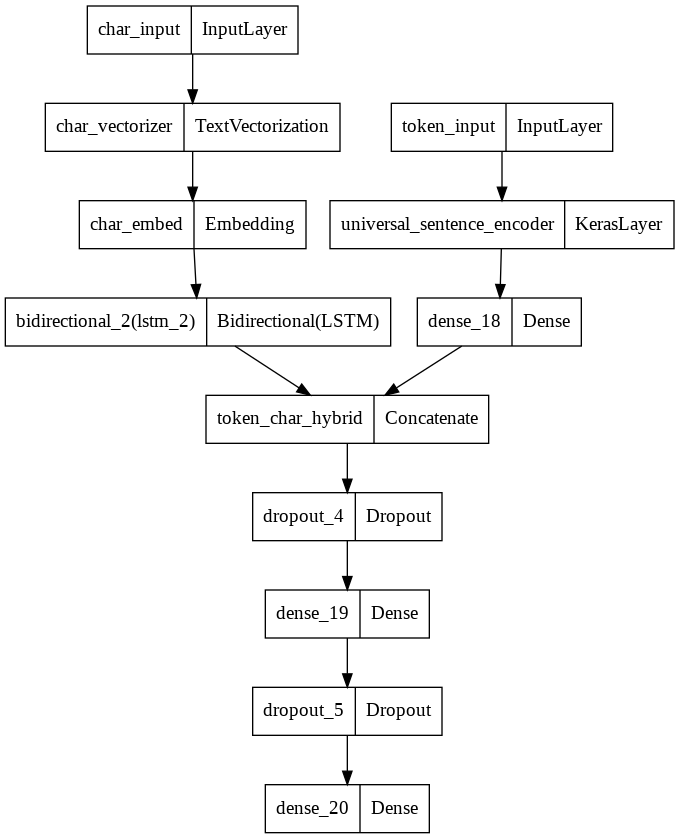

In [140]:
# Plot hybrid token and character model
from tensorflow.keras.utils import plot_model
plot_model(model_4)

In [141]:
# Compile token char model
model_4.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

### Combining token and character data into a tf.data dataset


In [142]:
# Combine chars and tokens into a dataset
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars)) # make data
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # make labels
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data, train_char_token_labels)) # combine data and labels

# Prefetch and batch train data
train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) 

# Repeat same steps validation data
val_char_token_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data, val_char_token_labels))
val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [143]:
# Check out training char and token embedding dataset
train_char_token_dataset, val_char_token_dataset

(<PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 3), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 3), dtype=tf.float64, name=None))>)

### Fitting a model on token and character-level sequences


In [144]:
# Fit the model on tokens and chars
model_4_history = model_4.fit(train_char_token_dataset,
                              epochs=100,
                              validation_data=val_char_token_dataset,
                              callbacks=[early_stopping, reduce_lr])

Epoch 1/100
112/112 [==============================] - 9s 44ms/step - loss: 0.9676 - accuracy: 0.5318 - val_loss: 0.9207 - val_accuracy: 0.5517 - lr: 0.0010
Epoch 2/100
112/112 [==============================] - 4s 34ms/step - loss: 0.8700 - accuracy: 0.5976 - val_loss: 0.8557 - val_accuracy: 0.6033 - lr: 0.0010
Epoch 3/100
112/112 [==============================] - 4s 34ms/step - loss: 0.8139 - accuracy: 0.6330 - val_loss: 0.8271 - val_accuracy: 0.6283 - lr: 0.0010
Epoch 4/100
112/112 [==============================] - 4s 34ms/step - loss: 0.7650 - accuracy: 0.6715 - val_loss: 0.8303 - val_accuracy: 0.6283 - lr: 0.0010
Epoch 5/100
112/112 [==============================] - 4s 34ms/step - loss: 0.7333 - accuracy: 0.6845 - val_loss: 0.8066 - val_accuracy: 0.6450 - lr: 0.0010
Epoch 6/100
112/112 [==============================] - 4s 33ms/step - loss: 0.6936 - accuracy: 0.7064 - val_loss: 0.8234 - val_accuracy: 0.6433 - lr: 0.0010
Epoch 7/100
112/112 [==============================] - 4s 

In [145]:
# Evaluate on the whole validation dataset
model_4.evaluate(val_char_token_dataset)

19/19 [==============================] - 0s 22ms/step - loss: 0.8928 - accuracy: 0.6517


[0.8928247094154358, 0.6516666412353516]

In [146]:
# Make predictions using the token-character model hybrid
model_4_pred_probs = model_4.predict(val_char_token_dataset)
model_4_pred_probs

array([[3.36469084e-01, 6.37622833e-01, 2.59080734e-02],
       [1.98821203e-04, 2.01598788e-03, 9.97785211e-01],
       [1.18027918e-01, 5.96670866e-01, 2.85301208e-01],
       ...,
       [8.53564322e-01, 9.04719755e-02, 5.59637807e-02],
       [1.19106635e-01, 7.63609409e-01, 1.17284037e-01],
       [3.90073299e-01, 5.10366321e-01, 9.95604098e-02]], dtype=float32)

In [147]:
# Turn prediction probabilities into prediction classes
model_4_preds = tf.argmax(model_4_pred_probs, axis=1)
model_4_preds

<tf.Tensor: shape=(600,), dtype=int64, numpy=
array([1, 2, 1, 0, 2, 0, 0, 1, 0, 0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 2, 2, 0,
       0, 2, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 2,
       2, 2, 0, 2, 0, 2, 2, 0, 1, 0, 2, 2, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 0, 1, 0, 2, 2, 2, 1, 1, 1, 0,
       0, 1, 2, 0, 2, 2, 2, 0, 1, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 1, 1,
       0, 0, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 0,
       2, 2, 2, 1, 2, 1, 1, 0, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 0, 2,
       2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 2, 0, 2, 2, 1, 0, 1, 2, 0, 2, 0, 2,
       2, 2, 0, 2, 1, 2, 1, 1, 2, 2, 1, 2, 0, 2, 0, 1, 0, 2, 2, 0, 0, 0,
       2, 1, 2, 2, 0, 1, 2, 2, 0, 1, 1, 2, 0, 2, 0, 0, 2, 0, 0, 2, 1, 2,
       2, 1, 2, 1, 2, 0, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 2,
       1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 2, 2, 1, 2, 0, 2, 2, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
     

In [148]:
# Get results of token-char-hybrid model
model_4_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_4_preds)
model_4_results

{'accuracy': 65.16666666666666,
 'f1': 0.6507525829691113,
 'precision': 0.6503884665499572,
 'recall': 0.6516666666666666}

## All model results

In [ ]:
all_results = {
    'model_1_conv1D' : model_1_results,
    'model_2_feature_plus_pretrained_token_embedding' : model_2_results,
    'model_3_conv1D_with_Char_embedding' : model_3_results,
    'model_4_pretrained_token_embedding_plus_char' : model_4_results
}

df = pd.DataFrame(all_results)

df = df.transpose()

df